### Dirichlet Multinomial Distribution

Here we will test the Dirichlet Process as examples from the tutorial of TFP.


In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

Copy pasting the examples from the webpage:
https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/DirichletMultinomial

Multinomial Dirichlet distribution is a distribution over...
histograms / counts of multiclass indicator vectors.

That is: 
* Consider a K>2 number of classes
* Consider a multinomial distribution over these K classes --> [p_0, p_1, ..., p_K-1]
* Consider indicator vectors of length K to be samples from the multinomial distribution 
* Each vector has a 1 in the position corresponding to the k'th class of [0 to K-1]
* Consider drawing N of these vectors from such a distribution
* Count the classes of these N vectors. It gives a K length **count** vector: [n_0, n_1, ..., n_K-1]
* For a particular N, a multinomial-dirichlet distribution gives the probability for every such possible count vector

*Note: If the count of any particular class is zero in the count vector, the probability computation seems to fail in the math (Bishop)!!*

####  Invoke the distribution with some typical settings

In [2]:
alpha = [0.1, 0.2, 3.] # Concentration
n = 60. # Total count
dist = tfd.DirichletMultinomial(n, alpha)

#### Compute some examples

In [3]:
# eg.1 counts same shape as alpha.
# counts = [0., 0., 2.]
# dist.prob(counts)  # Shape []

# eg.2 alpha will be broadcast to [[1., 2., 3.], [1., 2., 3.]] to match counts.
# counts = [[1., 59., 0.], [10., 20., 30.]]
counts = tf.placeholder(tf.float32, shape=(2,3))
P = dist.prob(counts)  # Shape [2]

# Draw a sample from the distribution
smpl = dist.sample(30)
P_smpl = dist.prob(smpl)

# alpha will be broadcast to shape [5, 7, 3] to match counts.
# counts = [[...]]  # Shape [5, 7, 3]
# dist.prob(counts)  # Shape [5, 7]


####  Run the session and print some values

In [4]:
counts_ = [[1., 59., 0.], [10., 20., 30.]]
sess = tf.Session()
[sP,ssmpl, sP_smpl] = sess.run([P,smpl, P_smpl], feed_dict={counts:counts_})
print('Probability of \n{} is:\n{}'.format(counts_, sP))
print('\n\nA Sample from the distribution:\n{}'.format(ssmpl))
print('Probability of above sample: {}'.format(sP_smpl))

Probability of 
[[1.0, 59.0, 0.0], [10.0, 20.0, 30.0]] is:
[1.7089145e-07 2.6459531e-05]


A Sample from the distribution:
[[ 0.  6. 54.]
 [ 0.  0. 60.]
 [ 0.  6. 54.]
 [ 0. 35. 25.]
 [ 0.  2. 58.]
 [ 0. 28. 32.]
 [ 0.  0. 60.]
 [ 8. 22. 30.]
 [ 0.  0. 60.]
 [ 0.  1. 59.]
 [ 0.  0. 60.]
 [ 0.  0. 60.]
 [ 0. 32. 28.]
 [ 0.  0. 60.]
 [ 1.  0. 59.]
 [ 0.  0. 60.]
 [ 0.  3. 57.]
 [ 0.  0. 60.]
 [ 0. 11. 49.]
 [ 0.  5. 55.]
 [ 0.  8. 52.]
 [27.  0. 33.]
 [ 1.  1. 58.]
 [ 0.  0. 60.]
 [ 0.  0. 60.]
 [ 0.  6. 54.]
 [ 0.  0. 60.]
 [ 0.  0. 60.]
 [ 0.  0. 60.]
 [ 0.  0. 60.]]
Probability of above sample: [1.6184596e-02 3.8777363e-01 1.6184596e-02 9.1002631e-04 4.3554164e-02
 1.7377377e-03 3.8777363e-01 2.9945999e-05 3.8777363e-01 7.5051874e-02
 3.8777363e-01 3.8777363e-01 1.2113792e-03 3.8777363e-01 3.7525989e-02
 3.8777363e-01 3.0876517e-02 3.8777363e-01 8.3023086e-03 1.9354176e-02
 1.1988526e-02 6.5932935e-04 7.2589996e-03 3.8777363e-01 3.8777360e-01
 1.6184596e-02 3.8777360e-01 3.8777360e-01

Visualizing:

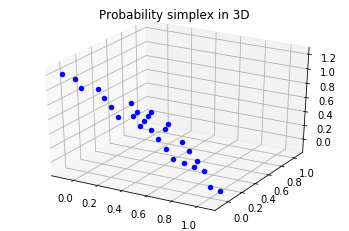

In [6]:
res   = 10
x = np.linspace(-0.1, 1.2, num=res)
y = np.linspace(-0.1, 1.2, num=res)
z = np.linspace(-0.1, 1.2, num=res)

P   = np.meshgrid(x,y,z)
P   = np.hstack((P[0].flatten()[:,np.newaxis], P[1].flatten()[:,np.newaxis],P[2].flatten()[:,np.newaxis]))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax   = fig.gca(projection='3d')
plt.title('Probability simplex in 3D')
for p in P:
    if np.sum(p)==1:
        ax.scatter([p[0]],[p[1]], [p[2]], c='b', depthshade=True)

plt.show()

### Dirichlet Distribution

In [20]:
import tensorflow_probability as tfp
tfd = tfp.distributions

# Create a single trivariate Dirichlet, with the 3rd class being three times
# more frequent than the first. I.e., batch_shape=[], event_shape=[3].
alpha = [1., 2, 3]
dist = tfd.Dirichlet(alpha)

X   = dist.sample(10)
print(X)

dist.sample([4, 5])  # shape: [4, 5, 3]

# x has one sample, one batch, three classes:
x = [.2, .3, .5]   # shape: [3]
dist.prob(x)       # shape: []

# x has two samples from one batch:
x = [[.1, .4, .5],
     [.2, .3, .5]]
dist.prob(x)         # shape: [2]

# alpha will be broadcast to shape [5, 7, 3] to match x.
# x = [[...]]   # shape: [5, 7, 3]
# dist.prob(x)  # shape: [5, 7]

sess  = tf.Session()
X_   = sess.run(X)

print(X_)
print(np.sum(X_,1))


Tensor("Dirichlet_13/sample/Reshape:0", shape=(10, 3), dtype=float32)
[[0.0560159  0.54469615 0.39928794]
 [0.08296225 0.3234645  0.5935732 ]
 [0.0517358  0.08613394 0.8621303 ]
 [0.41503718 0.16797297 0.41698983]
 [0.16597924 0.19188762 0.64213324]
 [0.00413064 0.39445394 0.6014154 ]
 [0.7289922  0.08764654 0.18336126]
 [0.4579909  0.38361347 0.15839568]
 [0.20924485 0.3245626  0.46619248]
 [0.15949422 0.21813326 0.6223725 ]]
[1.         1.         1.         1.         1.0000001  1.
 1.         1.         0.99999994 1.        ]
